In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("oil_production.csv")

In [3]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [4]:
t = df["DATEPRD"]

In [5]:
df.drop("DATEPRD",axis = 1, inplace = True)

In [6]:
X = df.iloc[:,0:6]
Y = df.iloc[:,8]

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

In [8]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNet, SGDRegressor, Lasso

In [9]:
from sklearn.svm import SVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

In [10]:
from sklearn.model_selection import train_test_split
#test_fraction = 0.15
#val_fraction = 0.15
#x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = test_fraction, shuffle = False, random_state = 42)

In [11]:
x_train = X
y_train = Y

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
x_train = scaler_x.fit_transform(x_train)#.as_matrix())
#x_val = scaler_x.transform(x_val.as_matrix())
#x_test = scaler_x.transform(x_test.as_matrix())

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1,1))
#y_val = scaler_y.transform(y_val.reshape(-1,1))
#y_test = scaler_y.transform(y_test.reshape(-1,1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [13]:
x_train.shape

(2365, 6)

In [14]:
y_train.shape

(2365, 1)

In [15]:
X = np.array(x_train)
y = np.array(y_train)

In [16]:
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)  
TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, val_index in tscv.split(X):
    print("TRAIN:", train_index, "VAL:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train_try, y_val_try = y[train_index], y[val_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [17]:
from sklearn.neural_network import MLPRegressor
model  = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size=32,
    learning_rate='adaptive', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=True, validation_fraction=0.2, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model1 = LinearRegression()
for i, (train_idx, val_idx) in enumerate(tscv.split(X)):
    print(" \nFold", i)
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    model.fit(X_train_cv, y_train_cv)
    print(model.score(X_val_cv, y_val_cv))

 
Fold 0
-1.5859333305228966
 
Fold 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-7.103987776995237
 
Fold 2
-0.7073141084401973
 
Fold 3
-2.909809949464919
 
Fold 4
-25.259746893154713


 
Fold 0
 
Fold 1
 
Fold 2
 
Fold 3
 
Fold 4


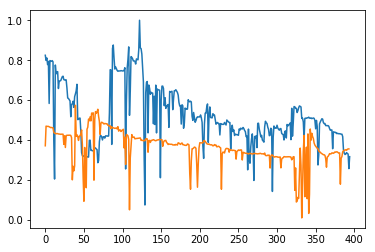

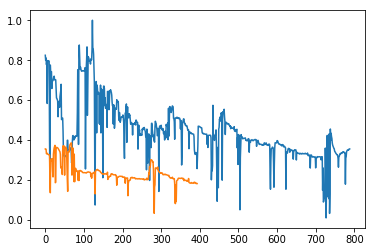

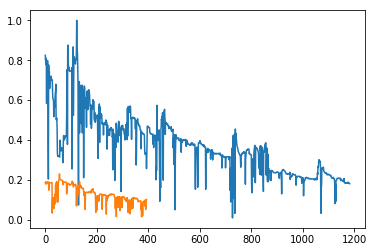

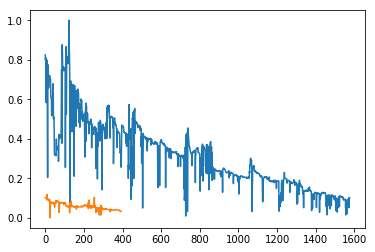

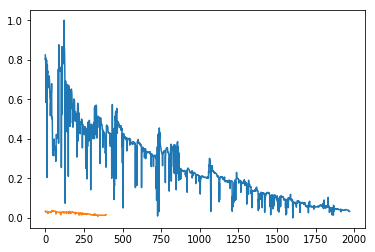

In [18]:
for i, (train_idx, val_idx) in enumerate(tscv.split(X)):
    print(" \nFold", i)
    fig, ax = plt.subplots()
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    plt.plot(y_train_cv)
    plt.plot(y_val_cv)

In [19]:
from sklearn.tree import DecisionTreeRegressor
model_dct = DecisionTreeRegressor()
tscvs = TimeSeriesSplit(n_splits=5)
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    print(" \nFold", i)
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    model_dct.fit(X_train_cv, y_train_cv)
    print(model_dct.score(X_val_cv, y_val_cv))

 
Fold 0
-4.812112107458733
 
Fold 1
-6.773632606967545
 
Fold 2
-2.1219328572320184
 
Fold 3
-1.2245267040437668
 
Fold 4
-5.709280184336534


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model_rf = RandomForestRegressor()
tscvs = TimeSeriesSplit(n_splits=5)
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    print(" \nFold", i)
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    model_rf.fit(X_train_cv, y_train_cv)
    print(model_rf.score(X_val_cv, y_val_cv))

 
Fold 0
-2.6055424532513083
 
Fold 1
-6.705430856709956
 
Fold 2
-3.5237095752568965
 
Fold 3
-6.0558406076639235
 
Fold 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vect

-4.635225140869536


 
Fold 0
 
Fold 1
 
Fold 2
 
Fold 3
 
Fold 4


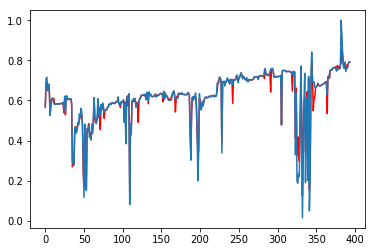

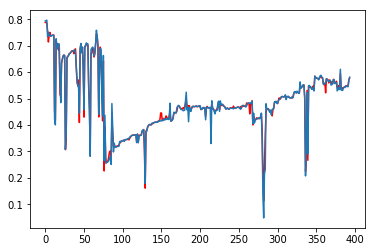

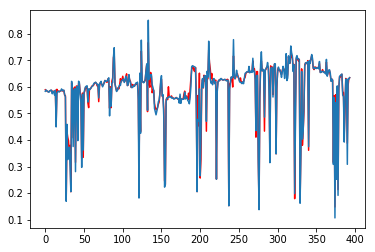

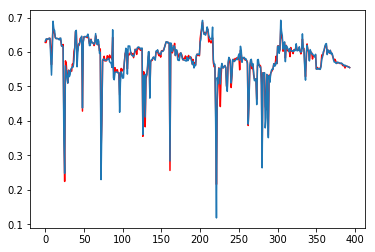

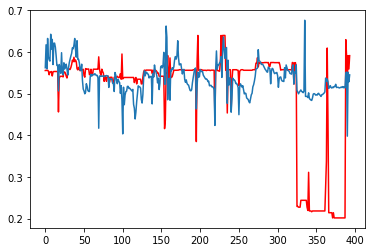

In [20]:
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    print(" \nFold", i)
    fig, ax = plt.subplots()
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    plt.plot(model_rf.predict(X_val_cv),'r')
    plt.plot(y_val_cv)

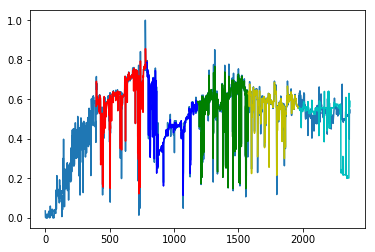

In [21]:
plt.plot(y_train)
color = {0:'r',1:'b', 2:'g', 3:'y',4:'c'}
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    #print(" \nFold", i)
    #fig, ax = plt.subplots()
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    plt.plot(val_idx,model_rf.predict(X_val_cv),color[i])
   

In [22]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.io as pio

In [23]:
rfc=RandomForestRegressor(random_state=42)

In [24]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [25]:
x_train.shape

(2365, 6)

In [26]:
y_train.shape

(2365, 1)

In [27]:
#from sklearn.model_selection import GridSearchCV
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(x_train, y_train)
#CV_rfc.best_params_

In [28]:
rfc=RandomForestRegressor(random_state=42, criterion = 'mae',
 max_depth= 8,
 max_features='sqrt',
 n_estimators= 200)

In [29]:
rfc.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
tscvs = TimeSeriesSplit(n_splits=5)
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    print(" \nFold", i)
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    rfc.fit(X_train_cv, y_train_cv)
    print(rfc.score(X_train_cv, y_train_cv))

 
Fold 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9837132130021375
 
Fold 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9716815035583768
 
Fold 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9550847865888453
 
Fold 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.946046142933425
 
Fold 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9384778231752672


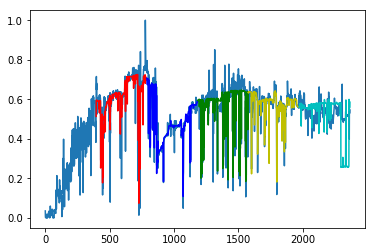

In [31]:
plt.plot(y_train)
color = {0:'r',1:'b', 2:'g', 3:'y',4:'c'}
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    #print(" \nFold", i)
    #fig, ax = plt.subplots()
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    plt.plot(val_idx,rfc.predict(X_val_cv),color[i])

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features='auto')
                            
#gsc = GridSearchCV(
    #estimator=model,
    #param_grid={
        #'n_estimators': range(50,126,25),
       # 'max_features': range(50,401,50),
        #'min_samples_leaf': range(20,50,5),
        #'min_samples_split': range(15,36,5),
    #},
   # scoring='r2',
   # cv=5
#)

#grid_result = gsc.fit(x_train, y_train)

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
model_ett = ExtraTreesRegressor(n_estimators=200, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features='auto')
model_ett.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=35, min_samples_split=25,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
tscvs = TimeSeriesSplit(n_splits=5)
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    print(" \nFold", i)
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    model_ett.fit(X_train_cv, y_train_cv)
    print(model_ett.score(X_train_cv, y_train_cv))

 
Fold 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8581495395511587
 
Fold 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8803420214406622
 
Fold 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8680066470811469
 
Fold 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8613264062700292
 
Fold 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8617755895319366


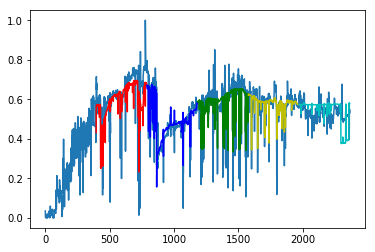

In [35]:
plt.plot(y_train)
color = {0:'r',1:'b', 2:'g', 3:'y',4:'c'}
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    #print(" \nFold", i)
    #fig, ax = plt.subplots()
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    plt.plot(val_idx,model_ett.predict(X_val_cv),color[i])
   

In [36]:
#plt.plot(model.predict(x_test))
#plt.plot(y_test)

In [37]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    print(" \nFold", i)
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    model_ridge.fit(X_train_cv, y_train_cv)
    print(model_ridge.score(X_train_cv, y_train_cv))

 
Fold 0
0.84992320402891
 
Fold 1
0.8617060526477335
 
Fold 2
0.7662053864416027
 
Fold 3
0.6603695615354185
 
Fold 4
0.5939539080910095


In [38]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=64,
                              learning_rate=0.005, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [59]:
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    print(" \nFold", i)
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    model_lgb.fit(X_train_cv, y_train_cv)
    print(model_lgb.score(X_val_cv, y_val_cv))

 
Fold 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-1.685258624588589
 
Fold 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-0.17057857417123135
 
Fold 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-0.3729945020002692
 
Fold 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-0.2858658077776035
 
Fold 4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-0.2522662927041224


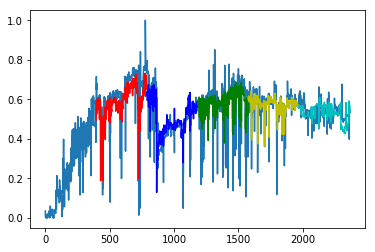

In [61]:
plt.plot(y_train)
color = {0:'r',1:'b', 2:'g', 3:'y',4:'c'}
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    #print(" \nFold", i)
    #fig, ax = plt.subplots()
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    plt.plot(val_idx,model_lgb.predict(X_val_cv),color[i])
   

In [41]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [42]:
from sklearn.metrics import mean_squared_error as mse
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    print(" \nFold", i)
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    model_xgb.fit(X_train_cv, y_train_cv)
    print(model_xgb.score(X_train_cv, y_train_cv))
    print(mse(model_xgb.predict(X_val_cv), y_val_cv))

 
Fold 0
0.9216652887609024
0.08146714122746057
 
Fold 1
0.942235605168303
0.03313181347221494
 
Fold 2
0.9288028779184639
0.01201431014250277
 
Fold 3
0.9211287769643952
0.0021312508304472486
 
Fold 4
0.9174669314781538
0.010305614314957077


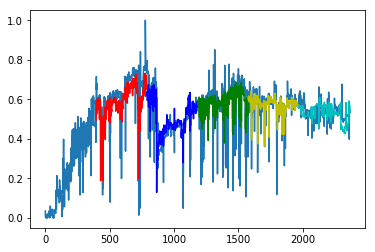

In [43]:
plt.plot(y_train)
color = {0:'r',1:'b', 2:'g', 3:'y',4:'c'}
for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    #print(" \nFold", i)
    #fig, ax = plt.subplots()
    X_train_cv = X[train_idx]
    y_train_cv = y[train_idx]
    X_val_cv = X[val_idx]
    y_val_cv = y[val_idx]
    plt.plot(val_idx,model_lgb.predict(X_val_cv),color[i])

In [45]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [46]:
def data_plot_in_one(X):
    x_axis = []
    y_axis = []
    for i, (train_idx, val_idx) in enumerate(tscvs.split(X)):
    #print(" \nFold", i)
    #fig, ax = plt.subplots()
        X_train_cv = X[train_idx]
        y_train_cv = y[train_idx]
        X_val_cv = X[val_idx]
        y_val_cv = y[val_idx]
        a, b = val_idx,model_lgb.predict(X_val_cv)
        x_axis.append(a)
        y_axis.append(scaler_y.inverse_transform(b.reshape(-1,1)))
    return x_axis, y_axis

In [47]:
a,b = data_plot_in_one(X)

In [50]:
trace0 = go.Scatter(x = a[0], y = b[0].reshape(-1,), name = "Prediction 1")
trace1 = go.Scatter(x = a[1], y = b[1].reshape(-1,), name = "Prediction 2")
trace2 = go.Scatter(x = a[2], y = b[2].reshape(-1,), name = "Prediction 3")
trace3 = go.Scatter(x = a[3], y = b[3].reshape(-1,), name = "Prediction 4")
trace4 = go.Scatter(x = a[4], y = b[4].reshape(-1,), name = "Prediction 5")
trace5 = go.Scatter(x = np.arange(len(y_train)), y = scaler_y.inverse_transform(y_train).reshape(-1,), name = 'Actual water rate')

layout = go.Layout(
    xaxis=dict(
        #title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        #title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
data =  [trace5,trace0,trace1,trace2,trace3,trace4]
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)